<a href="https://colab.research.google.com/github/AdrianAlbrecht/Collab/blob/main/SSI_sterownik_rozmyty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [511]:
import warnings
warnings.filterwarnings('ignore')
import random
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.markers import MarkerStyle
from matplotlib.transforms import Affine2D

In [512]:
class PojazdPolozenie:
    def __init__(self, x, y, kat):
        self.x = x
        self.y = y
        self.kat = kat #-180...+180 stopni, 0= oznacza zwrot do góry, 90=zwrot w prawo

auto = PojazdPolozenie(20,-100,-170)

In [513]:
class SymulacjaParametry:
    x_min = -100
    x_max = 100
    x_zasieg = 200
    y_min = -100
    y_max = 0
    y_zasieg = 100
    #rampa
    rampa_lewy = -30
    rampa_prawy = +30
    rampa_dol = -10
    rampa_gora = 0
    rampa_kat_docelowy_min = -20
    rampa_kat_docelowy_max = +20
    #ruch
    obrot_min = -20
    obrot_max = +20
    kat_min = -180
    kat_max = +180
    kat_zasieg = 360
    ruch_skok = 5.0


sym_params = SymulacjaParametry()

In [514]:
def euclidean_distance(x1, x2):
    return math.sqrt(sum((a - b) ** 2 for a, b in zip(x1, x2)))

In [515]:
class SterownikRozmyty:
    symulacja: SymulacjaParametry
    ciezarowka: PojazdPolozenie
    trasa: list[list[int, int]]

    def __init__(self, sym_params, pojazd):
        self.symulacja = sym_params
        self.ciezarowka = pojazd
        self.trasa = [[pojazd.x, pojazd.y, pojazd.kat]]

    def kat_do_celu(self):
        dest_x = (self.symulacja.rampa_lewy + self.symulacja.rampa_prawy) / 2
        dest_y = self.symulacja.rampa_gora
        return math.degrees(math.atan2(dest_x - self.ciezarowka.x, dest_y - self.ciezarowka.y))

    def sterownik(self):
        kat = self.kat_do_celu()
        print(f'{kat} vs {self.ciezarowka.kat}')
        if kat <self.ciezarowka.kat:
            if (self.ciezarowka.kat-kat) >= self.symulacja.obrot_max:
                return self.symulacja.obrot_min
            elif self.symulacja.obrot_min < (self.ciezarowka.kat - kat) < self.symulacja.obrot_max:
                return -(self.ciezarowka.kat - kat)
        elif kat > self.ciezarowka.kat:
            if (kat - self.ciezarowka.kat) >= self.symulacja.obrot_max:
                return self.symulacja.obrot_max
            elif self.symulacja.obrot_min < (kat - self.ciezarowka.kat) < self.symulacja.obrot_max:
                return kat - self.ciezarowka.kat
        return 0

    def symuluj(self, margines):
        dest_x = (self.symulacja.rampa_lewy + self.symulacja.rampa_prawy) / 2
        dest_y = self.symulacja.rampa_gora

        while not((dest_x - margines <= self.ciezarowka.x <= dest_x + margines) and (dest_y - margines <= self.ciezarowka.y <= dest_y + margines)):
            self.ciezarowka.kat += self.sterownik()

            if holowczyc := euclidean_distance([self.ciezarowka.x, self.ciezarowka.y], [dest_x, dest_y]) > self.symulacja.ruch_skok:
                za_100_metrow_prosto = self.symulacja.ruch_skok
            else:
                za_100_metrow_prosto = holowczyc

            radiany = math.radians(90 - self.ciezarowka.kat if self.ciezarowka.kat <= 90 else self.ciezarowka.kat - 90)
            self.ciezarowka.x += round((za_100_metrow_prosto * math.cos(radiany)),0)
            self.ciezarowka.y += round((za_100_metrow_prosto * math.sin(radiany)),0)
            polozenie = [self.ciezarowka.x, self.ciezarowka.y]
            self.trasa.append(polozenie+[self.ciezarowka.kat])
            print(f'Aktualne polozenie ciezarowki: {polozenie+[self.ciezarowka.kat]}')
            print(f'Punkt docelowy: {[dest_x, dest_y]}')
        return self.trasa

In [516]:
st_rozmyty = SterownikRozmyty(sym_params, auto)
trasa = st_rozmyty.symuluj(1)

-11.309932474020213 vs -170
Aktualne polozenie ciezarowki: [17.0, -104.0, -150]
Punkt docelowy: [0.0, 0]
-9.283552805261346 vs -150
Aktualne polozenie ciezarowki: [13.0, -107.0, -130]
Punkt docelowy: [0.0, 0]
-6.927218126009166 vs -130
Aktualne polozenie ciezarowki: [8.0, -109.0, -110]
Punkt docelowy: [0.0, 0]
-4.197668357160926 vs -110
Aktualne polozenie ciezarowki: [3.0, -109.0, -90]
Punkt docelowy: [0.0, 0]
-1.576550055183732 vs -90
Aktualne polozenie ciezarowki: [-2.0, -107.0, -70]
Punkt docelowy: [0.0, 0]
1.0708244547869634 vs -70
Aktualne polozenie ciezarowki: [-6.0, -104.0, -50]
Punkt docelowy: [0.0, 0]
3.3018656744350032 vs -50
Aktualne polozenie ciezarowki: [-8.0, -100.0, -30]
Punkt docelowy: [0.0, 0]
4.573921259900861 vs -30
Aktualne polozenie ciezarowki: [-9.0, -95.0, -10]
Punkt docelowy: [0.0, 0]
5.4118691523170295 vs -10
Aktualne polozenie ciezarowki: [-9.0, -90.0, 5.4118691523170295]
Punkt docelowy: [0.0, 0]
5.710593137499642 vs 5.4118691523170295
Aktualne polozenie cieza

In [517]:
trasa

[[20, -100, -170],
 [17.0, -104.0, -150],
 [13.0, -107.0, -130],
 [8.0, -109.0, -110],
 [3.0, -109.0, -90],
 [-2.0, -107.0, -70],
 [-6.0, -104.0, -50],
 [-8.0, -100.0, -30],
 [-9.0, -95.0, -10],
 [-9.0, -90.0, 5.4118691523170295],
 [-9.0, -85.0, 5.710593137499642],
 [-8.0, -80.0, 6.044092162241109],
 [-8.0, -75.0, 5.710593137499642],
 [-7.0, -70.0, 6.088528154195175],
 [-7.0, -65.0, 5.710593137499642],
 [-6.0, -60.0, 6.14662565964667],
 [-6.0, -55.0, 5.710593137499642],
 [-5.0, -50.0, 6.225829064425769],
 [-5.0, -45.0, 5.710593137499642],
 [-4.0, -40.0, 6.34019174590991],
 [-4.0, -35.0, 5.710593137499642],
 [-3.0, -30.0, 6.519801751656986],
 [-3.0, -25.0, 5.710593137499642],
 [-2.0, -20.0, 6.84277341263094],
 [-2.0, -15.0, 5.710593137499642],
 [-1.0, -10.0, 7.594643368591445],
 [-1.0, -5.0, 5.710593137499642],
 [0.0, 0.0, 11.309932474020213]]

In [518]:
def wizualizacja(symulacja, trasa):
    plt.figure(figsize=(15, 10))
    aktualna_trasa = []
    for x_t in trasa:
        aktualna_trasa.append(x_t)
        x = [punkt[0] for punkt in aktualna_trasa]
        y = [punkt[1] for punkt in aktualna_trasa]
        dest_x = (symulacja.rampa_lewy + symulacja.rampa_prawy) / 2
        dest_y = symulacja.rampa_gora
        strzalka_kierunkowa = MarkerStyle(marker='^', transform=Affine2D().rotate_deg(-x_t[-1]))
        plt.plot([symulacja.rampa_lewy, symulacja.rampa_lewy, symulacja.rampa_prawy, symulacja.rampa_prawy], [symulacja.rampa_gora, symulacja.rampa_dol, symulacja.rampa_dol, symulacja.rampa_gora], color='r', linestyle='dotted')
        plt.plot(x,y,color='black',linestyle='dotted')
        plt.scatter(dest_x, dest_y, color='green', marker = 's', s = 200)
        plt.scatter(x_t[0],x_t[1], color='black', marker = strzalka_kierunkowa, s = 150)


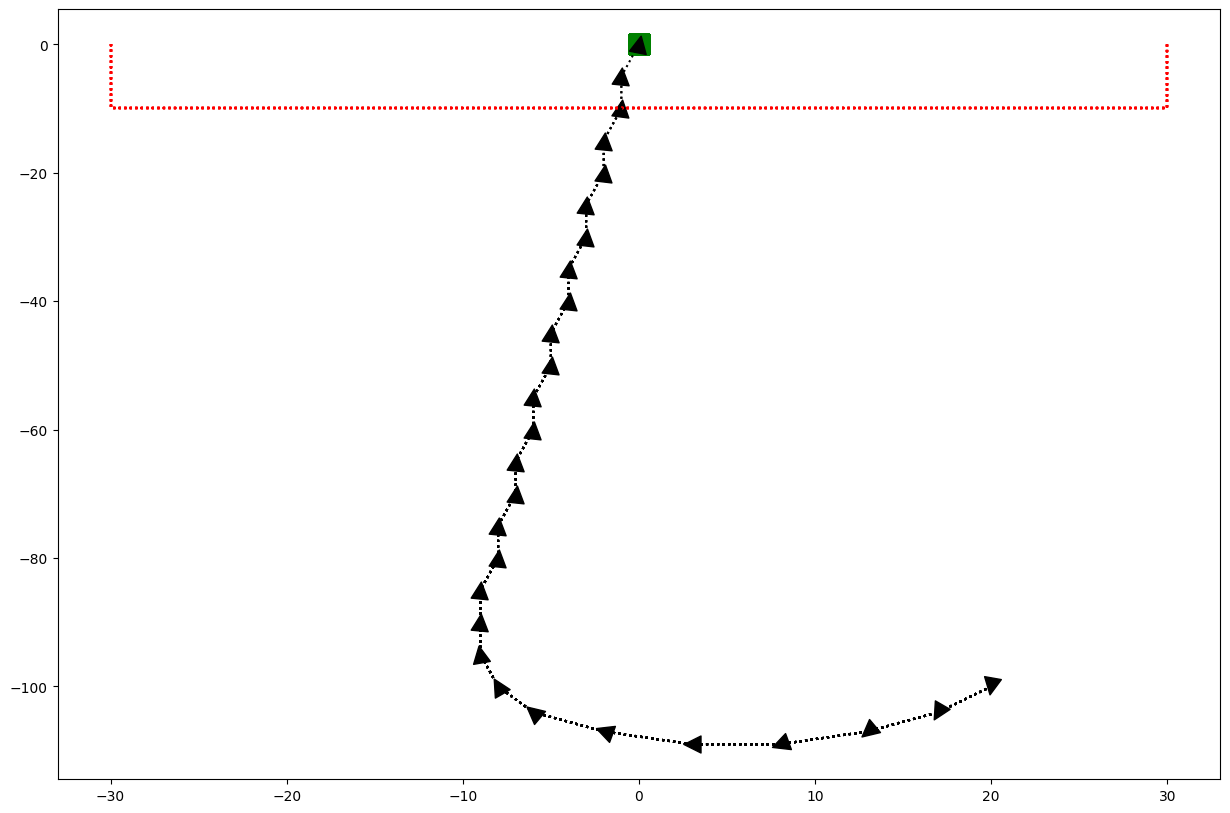

In [519]:
wizualizacja(sym_params, trasa)